# Exploratory data analysis(Sex& Age&Pclass, Family, Fare)

In [3]:
## Import modules

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
## Import file(Should put 'r' in front to avoid SyntaxError)

In [9]:
df_train=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\train.csv')

In [10]:
df_test=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\test.csv')

## Pclasss-Sex-Age-Survival analysis

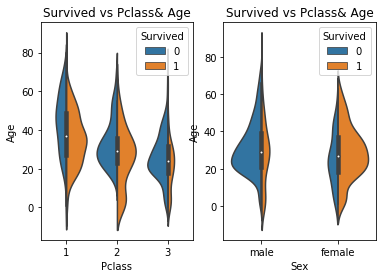

In [13]:
f, ax = plt.subplots(1, 2)
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Survived vs Pclass& Age')

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Survived vs Pclass& Age')

plt.show()

Left picture: First and second class showed higher chance of survival, the number of died young people is mostly foucsed on 3rd class,Age-Pclass have negative relationship(as the class get better, the age become older) 

Right picture: Number of female survived is higher than the number of male survived. 

## Embarked-Survival analysis

How does a port one used to get on to Titanic affect survival rate?

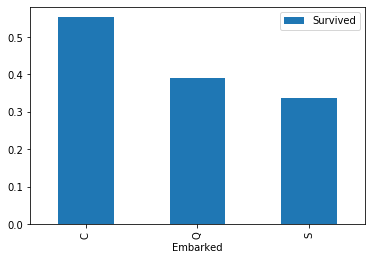

In [22]:
f, ax=plt.subplots(1, 1)
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax)

Passengers from C port is most likely to have survived. Why?

Text(0.5, 1.0, 'Relationship between Embarked-Pclass')

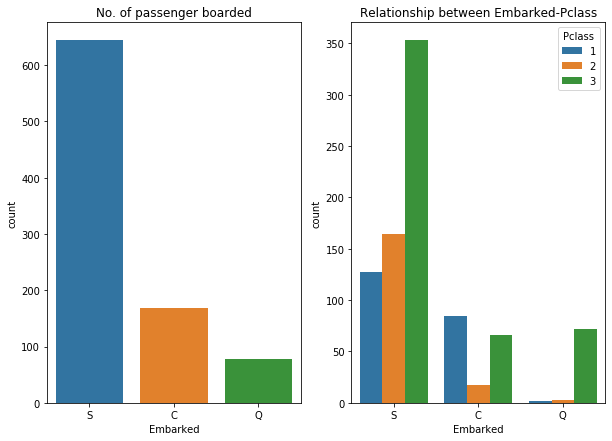

In [44]:
f, ax=plt.subplots(1, 2, figsize=(10, 7))
sns.countplot('Embarked', data=df_train, ax=ax[0])
ax[0].set_title('No. of passenger boarded')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1])
ax[1].set_title('Relationship between Embarked-Pclass')


Clearly, most 3rd class people boarded at the port S while seemingly no people boarded at port Q; therefore, the number of survival rate is hgher in Q while low in S. 

## Family number-Survival analysis

Combine SibSp, Parch into one dataset to make up a Family dataset.

In [58]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
#Why do I put 1? 'Because Sibsp, Parch does not include the passenger himself. SibSp' refers the number of sibling+spouse the passenger aboarded wih.'SibSp' refers the number of parents and chold the passenger aboarded wih

In [57]:
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

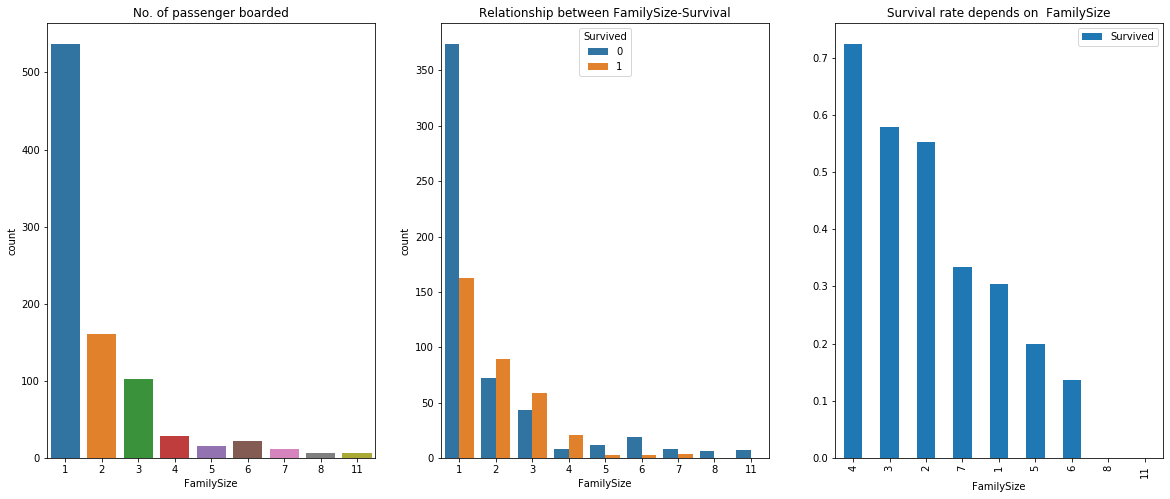

In [68]:
f, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('No. of passenger boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Relationship between FamilySize-Survival')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False). plot.bar(ax=ax[2])
ax[2].set_title('Survival rate depends on  FamilySize')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

Passengers with 2-4 companies showed highest chance of survival while no family(1), or having too many companies(over 4) shows lower chance of survival.

## Fare

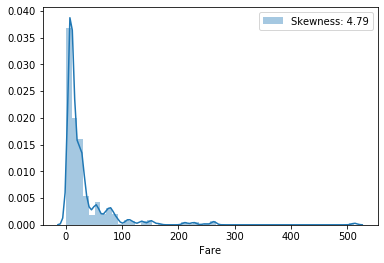

In [70]:
f, ax=plt.subplots(1,1)
g=sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

The grpah is right-skewed(positively skewed) that cannot be used to teach the model.
Therefore, to reduce the effect of outliers, should use log to make the grpah not skewed.

In [72]:
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
#use of 'lambda' to log the outliers

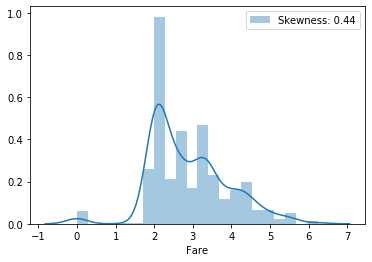

In [73]:
f, ax=plt.subplots(1,1)
g=sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')